This Notebook uses simple unit tests to check the correctness of your code.

Make sure the tests for each cell pass before continuing to the next because some tests rely on state created in previous cells. 

If you find it difficult to debug a particular step try to **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart & Run All), to clear any previously stored data.

Make sure you fill in all places that say `YOUR CODE HERE` or "YOUR ANSWER HERE".

You must delete `raise NotImplementedError()` when you implement each solution.

Goldsmiths students only: You must use the template provided to be graded. Do not rename the file and use only use relative filenames otherwise the autograder will fail to grade your work. 

---

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# For unit testing answers.
from unittest.mock import patch

## UK CO2 emissions data

Open the file 'carbon-emissions-borough.xls' in a spreadsheet program and take a look at the information in the 'Metadata' sheet and the data in the 'TOTAL' sheet. 

Looking at the 'TOTAL' sheet data ask yourself:
- how many data variables are there?
- which variables could be useful index variables?
- which variables contain raw data values and which contain aggregate statistics?
- are the units of measurement consistant for this table? (hint: look what happens at row 38).

Although the layout of this data may be relatively intuitiate from a human perspective, it is very much *not* tidy from a data processing point of view.

We are going to convert some of this data step-by-step into tidy data.

First, read the entire sheet named 'TOTAL' from the file 'carbon-emissions-borough.xls' into a pandas DataFrame and assign it to the variable `df`.

Once you have implemented this step remove the `raise NotImplementedError()` line. 

Run the cell check the output corresponds to what you see in the Excel sheet.

Then test your answer by running the unit tests in the following cell.

- hint: look up the documentation for `pandas.read_excel()`.

In [3]:
# YOUR CODE HERE

df = pd.read_excel('carbon-emissions-borough.xls', sheet_name='TOTAL')
# df = ...

# Show both the head and tail of the dataset.
df.head().append(df.tail())

,Unnamed: 0,Unnamed: 1,Industry and Commercial,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Per Capita Emissions (t),Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71
0,Code,Name,2005.000000,2006.000000,2007.000000,2008.000000,2009.000000,2010.000000,2011.000000,2012.000000,...,2005.000000,2006.000000,2007.000000,2008.000000,2009.000000,2010.000000,2011.000000,2012.000000,2013.000000,2014.000000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E09000001,City of London,1546.381669,1679.706582,1580.466758,1603.958736,1402.027918,1554.734654,1317.152609,1461.040299,...,228.878818,243.356976,218.936877,226.639766,197.586608,222.185954,187.349845,201.597642,184.966847,128.358444
3,E09000002,Barking and Dagenham,396.223474,397.953470,400.882366,399.142772,344.520522,379.972376,330.862589,355.103504,...,5.600614,5.602127,5.473062,5.238514,4.606023,4.769989,4.191221,4.303707,4.063282,3.246635
4,E09000003,Barnet,460.475157,471.990440,442.357543,453.078514,403.114225,426.388167,382.868508,402.606210,...,5.385460,5.371425,5.131500,5.106323,4.577371,4.763128,4.190719,4.362576,4.209762,3.774475
48,N92000002,Northern Ireland,7241.720593,7333.267632,7537.526763,7039.256156,6218.282449,6570.964353,6185.086384,6176.790170,...,9.487987,9.657095,9.638010,9.255429,8.622417,8.952709,8.247287,8.347183,8.297365,7.780931
49,S92000003,Scotland,21382.264592,21764.011985,21327.691896,20855.602203,18237.032952,19427.789345,18002.372195,18359.486570,...,8.361874,8.349211,8.136277,7.890615,7.017615,7.317536,6.568562,6.745402,6.557330,5.668720
50,W92000004,Wales,18855.092051,19329.352726,19206.325986,18282.475459,15047.097609,17579.162216,15804.110743,14674.362550,...,11.228738,11.344325,11.100155,10.710038,9.267168,10.200334,9.181795,8.920358,9.731792,9.283575
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,K02000001,United Kingdom,244649.558947,243923.061357,238540.256977,230790.049701,199214.577959,208471.322139,188754.434791,201045.769839,...,8.763709,8.668343,8.438064,8.155000,7.298350,7.522974,6.809908,7.085160,6.921009,6.251041


In [39]:
# Check we have created a DataFrame.
assert type(df) == pd.DataFrame
# Basic sanity check that we are loading the correct data.
assert df.ndim == 2
assert df.shape == (53, 72)
assert df.iloc[0, 0] == 'Code'
assert df.iloc[-1, 1] == 'United Kingdom'
assert df.iloc[0:, 2].sum().round() == 696384.0

AssertionError: 

Hopefully loading the entire sheet into a DataFrame was relatively straightforward. But this is not really the best way to start analysing this data because the structure is very untidy.

Let's assume for now we are interested only in data concerning *Industry and Commercial* carbon emissions in the most recent year in this dataset: 2014.

Copy and paste the previous cell and now add the `usecols` parameter to read in the 'TOTAL' data again but selecting only three columns corresponding to:
1. *Code* values
2. *Name* values
3. 2014 emission values for *Industry and Commercial*.

For now don't worry about filtering rows, just read in all available rows.

Again assign the new DataFrame to the variable `df`.

- hint: lookup the `pd.read_excel()` `usecols` parameter. You can specify columns using Excel column labels ('A', 'B' etc.) or index numbers.

In [4]:
# YOUR CODE HERE

df = pd.read_excel('carbon-emissions-borough.xls', sheet_name='TOTAL', usecols= 'A,B,L')
# df = ...

# Show both the head and tail of the dataset.
df.head().append(df.tail())

,Unnamed: 0,Unnamed: 1,Unnamed: 11
0,Code,Name,2014.000000
1,NaN,NaN,NaN
2,E09000001,City of London,964.602728
3,E09000002,Barking and Dagenham,229.942450
4,E09000003,Barnet,371.917496
48,N92000002,Northern Ireland,5856.305604
49,S92000003,Scotland,15058.145566
50,W92000004,Wales,17161.251122
51,NaN,NaN,NaN
52,K02000001,United Kingdom,178229.287688


In [34]:
# Check we have created a DataFrame.
assert type(df) == pd.DataFrame
# Basic sanity check that we are loading the correct data.
assert df.ndim == 2
assert df.shape == (53, 3)
assert df.iloc[0, 0] == 'Code'
assert df.iloc[-1, 1] == 'United Kingdom'
assert df.iloc[0:, 2].sum().round() == 499978.0

AssertionError: 

Next let's try and sort out our column headers.

Copy and paste the previous cell and now add the `skiprows` parameter to read in the 'MYE' data again but skipping the unnecessary rows at the top of the spreadsheet.

By default pandas uses the first row in the Excel file as the column names for our DataFrame. This isn't very useful for this spreadsheet because the first row is either empty or contains a label indicating that a group of columns correspond to a single variable measured over time.

The simplest thing we can do here is just skip the first row (which is row `0` in pandas). Also skip the empty third row  (row `2` in pandas).

- hint: look up the `pd.read_excel()` `skiprows` parameter.

In [5]:
# YOUR CODE HERE
df = pd.read_excel('carbon-emissions-borough.xls', sheet_name='TOTAL', skiprows=[0,2], usecols= 'A,B,L')
# df = ...

# Show both the head and tail of the dataset.
df.head().append(df.tail())

,Code,Name,2014
0,E09000001,City of London,964.602728
1,E09000002,Barking and Dagenham,229.942450
2,E09000003,Barnet,371.917496
3,E09000004,Bexley,378.441087
4,E09000005,Brent,500.860891
46,N92000002,Northern Ireland,5856.305604
47,S92000003,Scotland,15058.145566
48,W92000004,Wales,17161.251122
49,NaN,NaN,NaN
50,K02000001,United Kingdom,178229.287688


In [ ]:
# Check we have created a DataFrame.
assert type(df) == pd.DataFrame
# Basic sanity check that we are loading the correct data.
assert df.ndim == 2
assert df.shape == (51, 3)
assert df.iloc[0, 0] == 'E09000001'
assert df.iloc[-1, 1] == 'United Kingdom'
assert df.iloc[0:, 2].sum().round() == 497964.0

This is beginning to look reasonable, now we can deal with the rows.

Thinking about tidy data rule 3:

> Each type of observational unit forms a table

we have a problem in that different observational units are used in this spreadsheet.

- rows 4-36: London borough
- rows 38-46: UK regions
- rows 48-52: UK nations
- row 53: UK

So let's focus on London. Copy and paste the previous cell and add a `nrows` parameter to create a new DataFrame which contains only the rows corresponding to London boroughs.

- hint: look up the `pd.read_excel()` `nrows` parameter.

In [6]:
# YOUR CODE HERE
df = pd.read_excel('carbon-emissions-borough.xls', sheet_name='TOTAL', skiprows=[0,2], usecols= 'A,B,L', nrows=33)
# df = ...

# Show both the head and tail of the dataset.
df.head().append(df.tail())

,Code,Name,2014
0,E09000001,City of London,964.602728
1,E09000002,Barking and Dagenham,229.942450
2,E09000003,Barnet,371.917496
3,E09000004,Bexley,378.441087
4,E09000005,Brent,500.860891
28,E09000029,Sutton,191.355736
29,E09000030,Tower Hamlets,1144.045742
30,E09000031,Waltham Forest,230.298939
31,E09000032,Wandsworth,336.150782
32,E09000033,Westminster,1844.326719


In [ ]:
### Check we have created a DataFrame.
assert type(df) == pd.DataFrame
# Basic sanity check that we are loading the correct data.
assert df.ndim == 2
assert df.shape == (33, 3)
assert df.iloc[0, 0] == 'E09000001'
assert df.iloc[-1, 1] == 'Westminster'
assert df.iloc[0:, 2].sum().round() == 15307.0

Now that we have a consistant observational unit, which variable should we use for our index?

`Code` looks promising as it seems to be a unique identifier with a consistant structure. The downside being that the codes are not very human readible.

`Name` would be a more convienent choice, but is it suitable as a unique identifier?

With such a small dataset we could check this manually, but let's check it programatically by counting the number of duplicated values in the `Name` column.

For the purpose of unit-testing we need to write our code inside another function called `test_duplicates`. In your own analysis notebooks it wouldn't strictly be necessary to do this, but writing functions to abstract certain tasks can have benefits such as making your code easier to understand and reducing copy-and-paste between code blocks.

- hint: the answer is zero, but prove this using the pandas `Series.duplicated` and `Series.sum` methods.

In [9]:
def test_duplicates():
    # YOUR CODE HERE
    bool_series = df.duplicated(subset='Name').sum()
    print(bool_series)
    
# Call the test_duplicates function. 
# Should return the number of duplicated values in the 'Name' column (zero in this case).
test_duplicates()

0


In [1]:
with patch('pandas.Series.duplicated') as mock_duplicated:
    test_duplicates()
mock_duplicated.assert_called_once_with()

with patch('pandas.Series.sum') as mock_sum:
    test_duplicates()
mock_sum.assert_called_once_with()

assert test_duplicates() == 0

NameError: name 'patch' is not defined

Now we can be sure that the `Name` column can be used as a unique identifier we can assign it as the index.

There is also no need to read the `Code` variable any more.

So create a new DataFrame where:
- `Name` is assigned as the index
- the only variable is the 2014 emission values for *Industry and Commercial*
- rows correspond only to London boroughs.


- hint: lookup the `pd.read_excel()` `index_col` parameter.

In [8]:
# YOUR CODE HERE

# df = ...
df = pd.read_excel('carbon-emissions-borough.xls', sheet_name='TOTAL', skiprows=[0,2], usecols= 'B,L', nrows=33, index_col='Name')

# Show both the head and tail of the dataset.
df.head().append(df.tail())

,2014
Name,
City of London,964.602728
Barking and Dagenham,229.942450
Barnet,371.917496
Bexley,378.441087
Brent,500.860891
Sutton,191.355736
Tower Hamlets,1144.045742
Waltham Forest,230.298939
Wandsworth,336.150782


In [ ]:
### Check we have created a DataFrame.
assert type(df) == pd.DataFrame
# Basic sanity check that we are loading the correct data.
assert df.ndim == 2
assert df.shape == (33, 1)
assert df.index[0] == 'City of London'
assert df.iloc[0, 0].round(2) == 964.60
assert df.iloc[-1, 0].round(2) == 1844.33
assert df.iloc[0:, 0].sum().round(2) == 15306.93

Create a new DataFrame the same as previously, but now with the following columns.

- 2014 emission values for *Industry and Commercial*
- 2014 emission values for *Domestic*
- 2014 emission values for *Transport*
- 2014 emission values for *N. LULUCF Net Emissions* (Land use, land-use change, and forestry)

Use the same *Names* column as the index (London borough names).

Provide a `names` argument to `read_excel` with the following value.

`['borough', 'industry', 'domestic', 'transport', 'lulucf']`

- hint: lookup the `pd.read_excel()` `names` parameter.

In [14]:
# YOUR CODE HERE

df = pd.read_excel('carbon-emissions-borough.xls', sheet_name='TOTAL', skiprows=[0,2], usecols= 'B,L,V,AF,AP', nrows=33, index_col='borough', names=['borough', 'industry', 'domestic', 'transport', 'lulucf'])

# df = ...

# Show both the head and tail of the dataset.
df.head().append(df.tail())

,industry,domestic,transport,lulucf
borough,,,,
City of London,964.602728,16.507568,54.963579,0.035487
Barking and Dagenham,229.942450,242.875256,170.536666,0.433872
Barnet,371.917496,645.777151,395.881689,1.531035
Bexley,378.441087,379.382056,215.832536,0.965581
Brent,500.860891,450.110050,223.539372,0.562920
Sutton,191.355736,324.460211,148.954003,0.827070
Tower Hamlets,1144.045742,291.055758,267.994354,0.372140
Waltham Forest,230.298939,361.911149,184.198215,3.932609
Wandsworth,336.150782,477.157103,224.551128,0.633385


In [ ]:
### Check we have created a DataFrame.
assert type(df) == pd.DataFrame
# Basic sanity check that we are loading the correct data.
assert df.ndim == 2
assert df.shape == (33, 4)
assert df.index[0] == 'City of London'
assert df.index.name == 'borough'
assert list(df.columns) == ['industry', 'domestic', 'transport', 'lulucf']
assert df.loc[:, 'industry'].sum().round(2) == 15306.93
assert df.loc[:, 'domestic'].sum().round(2) == 12556.89
assert df.loc[:, 'transport'].sum().round(2) == 7927.57
assert df.loc[:, 'lulucf'].sum().round(2) == 26.0

In [21]:
# Inspect the DataFrame info.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, City of London to Westminster
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   industry   33 non-null     float64
 1   domestic   33 non-null     float64
 2   transport  33 non-null     float64
 3   lulucf     33 non-null     float64
dtypes: float64(4)
memory usage: 1.3+ KB


The dtypes for all of our variabes are float64, which is reasonable.

However, the index is currently dtype `object`, so we could improve on this slightly by telling pandas that this is a categorical index (there is only a finite list of London boroughs, no more and no less).

Using the same `df` variable, convert the index to a categorical index.

- hint: lookup `pd.Index.astype`.

In [15]:
# YOUR CODE HERE
df = pd.read_excel('carbon-emissions-borough.xls', sheet_name='TOTAL', skiprows=[0,2], usecols= 'B,L,V,AF,AP', nrows=33, index_col='borough', names=['borough', 'industry', 'domestic', 'transport', 'lulucf'])

# df.index = ...
df.index = df.index.astype('category')
df.index.dtype

CategoricalDtype(categories=['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent',
                  'Bromley', 'Camden', 'City of London', 'Croydon', 'Ealing',
                  'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham',
                  'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow',
                  'Islington', 'Kensington and Chelsea',
                  'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton',
                  'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
                  'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
                  'Westminster'],
                 ordered=False)

In [ ]:
assert type(df.index.dtype) == pd.CategoricalDtype
assert list(df.index.categories) == [
    'Barking and Dagenham', 'Barnet', 'Bexley', 'Brent',
    'Bromley', 'Camden', 'City of London', 'Croydon', 'Ealing',
    'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham',
    'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow',
    'Islington', 'Kensington and Chelsea',
    'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton',
    'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
    'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
    'Westminster'
]

Our DataFrame is almost tidy!

Excpet that the columns `industry`, `domestic`, `transport`, `lulucf` are actually the measure of the same variable: Kilotonnes of Carbon Dioxide (kt CO2), so should be in a single column. A second indicator variable needs to be created specifying the sector the measurement corresponds to.

This transformation can be achieved using the `pd.DataFrame.melt` method. Create a new melted DataFrame inside the `apply_melt` function, which should return the tidy DataFrame. Assign the tidy DataFrame to the variable `df_2014`.

- name the indicator variable `sector`
- name the value variable `co2`
- ensure the index is preserved

In [29]:
# You wouldn't necessarily create a function to perform this melt operation
# in a Notebook, but it's necessary for unit testing!
df = pd.read_excel('carbon-emissions-borough.xls', sheet_name='TOTAL', skiprows=[0,2], usecols= 'B,L,V,AF,AP', nrows=33, index_col='borough',names=['borough', 'industry', 'domestic', 'transport', 'lulucf'])

def apply_melt():
    # YOUR CODE HERE
    return df.reset_index().melt(id_vars='borough' ,var_name='sector', value_name='co2')
    # return ...

df_2014 = apply_melt()

df_2014.head().append(df_2014.tail())

,borough,sector,co2
0,City of London,industry,964.602728
1,Barking and Dagenham,industry,229.942450
2,Barnet,industry,371.917496
3,Bexley,industry,378.441087
4,Brent,industry,500.860891
127,Sutton,lulucf,0.827070
128,Tower Hamlets,lulucf,0.372140
129,Waltham Forest,lulucf,3.932609
130,Wandsworth,lulucf,0.633385
131,Westminster,lulucf,0.369015


In [21]:
### Check we have created a DataFrame.
assert type(df_2014) == pd.DataFrame
# Basic sanity check that we have processed the data correctly.
assert df_2014.ndim == 2
assert df_2014.shape == (132, 2)
assert df_2014.index.name == 'borough'
assert type(df_2014.index.dtype) == pd.CategoricalDtype
assert list(df_2014.columns) == ['sector', 'co2']
assert list(df_2014['sector'].unique() == ['industry', 'domestic', 'transport', 'lulucf'])
assert df_2014['co2'].sum().round(2) == 35817.39
# Test melt was actually used!
with patch('pandas.DataFrame.melt') as mock_melt:
    apply_melt()
mock_melt.assert_called_once()

AssertionError: 

## Simple visualisation examples

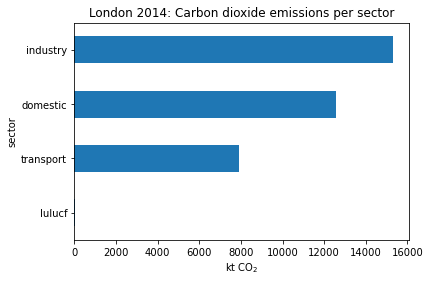

In [22]:
ax = df_2014.groupby('sector').sum().sort_values(by='co2').plot.barh(legend=False)
ax.set_xlabel('kt CO$_2$')
ax.set_title('London 2014: Carbon dioxide emissions per sector')
plt.show()

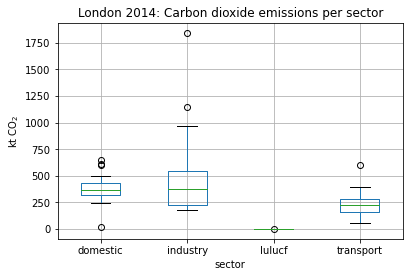

In [23]:
ax = df_2014.boxplot(by='sector')
ax.set_xlabel('sector')
ax.set_ylabel('kt CO$_2$')
ax.set_title('London 2014: Carbon dioxide emissions per sector')
ax.figure.suptitle(None)
plt.show()

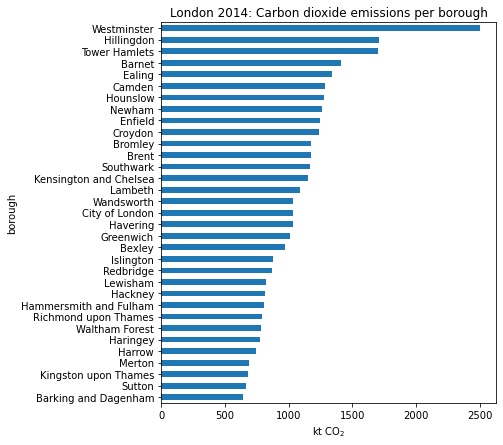

In [24]:
ax = df_2014.groupby('borough').sum().sort_values(by='co2').plot.barh(legend=False, figsize=(6, 7))
ax.set_xlabel('kt CO$_2$')
ax.set_title('London 2014: Carbon dioxide emissions per borough')
plt.show()